In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -512            # valor mínimo de x
b = 512             # valor máximo de x
decimales=3        # número de decimales
n = 2              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 0.02  # probabilidad de mutación
generaciones = 200 # número de generaciones
target = -1000         # objetivo de minimización 

In [123]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [124]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 0 ... 0 0 1]
 [1 1 1 ... 1 0 0]
 [1 1 0 ... 0 0 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 1 0 ... 1 0 1]
 [1 1 1 ... 1 0 1]]


In [125]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [126]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [127]:
def funcion(x,y):
    term1 = np.sin(np.sqrt(np.abs(x/2 + y + 47)))
    term2 = np.sin(np.sqrt(np.abs(x - (y + 47))))
    return -(y + 47) * term1 - x * term2

In [128]:
def eva_funcion(ind, a, b, m, decimales):
    x,y = deco_ind(ind, a, b, m, decimales)
    return funcion(x,y)

In [129]:
def SUS(pob, m, a, b, decimales, epsilon):
    aptitudes = []
    for ind in pob:
        f_val = eva_funcion(ind, m, a, b, decimales)
        aptitud = f_val  # función de evaluación de aptitud
        aptitudes.append(aptitud)
    aptitudes = np.array(aptitudes)
    
    total_aptitud = np.sum(aptitudes) # suma acumulada de aptitudes
    probas = aptitudes / total_aptitud
    
    
    acc_n = np.cumsum(probas) # acumulado de las sumas
    
    punto = 1/pob_size
    t = np.random.rand() * punto
    pt = t +np.arange(pob_size) * punto

    selecto_index = []
    selecto_ind = []
    index = 0
    for punto in pt: # se va hasta el acumulado, cuando coincida con el punto
        
        while acc_n[index] < punto:
            index += 1
        selecto_index.append(index)
        selecto_ind.append(pob[index])
    
    return selecto_ind, selecto_index

In [130]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [131]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

Generación 1 - Mejor evaluación: -603.217
Generación 2 - Mejor evaluación: -293.692
Generación 3 - Mejor evaluación: -489.23
Generación 4 - Mejor evaluación: -370.368
Generación 5 - Mejor evaluación: -693.476
Generación 6 - Mejor evaluación: -688.094
Generación 7 - Mejor evaluación: -291.705
Generación 8 - Mejor evaluación: -712.049
Generación 9 - Mejor evaluación: -680.13
Generación 10 - Mejor evaluación: -338.576
Generación 11 - Mejor evaluación: -768.903
Generación 12 - Mejor evaluación: -368.409
Generación 13 - Mejor evaluación: -349.981
Generación 14 - Mejor evaluación: -803.129
Generación 15 - Mejor evaluación: -686.339
Generación 16 - Mejor evaluación: -421.405
Generación 17 - Mejor evaluación: -737.299
Generación 18 - Mejor evaluación: -289.305
Generación 19 - Mejor evaluación: -687.589
Generación 20 - Mejor evaluación: -150.117
Generación 21 - Mejor evaluación: -287.278
Generación 22 - Mejor evaluación: -290.952
Generación 23 - Mejor evaluación: -743.652
Generación 24 - Mejor 

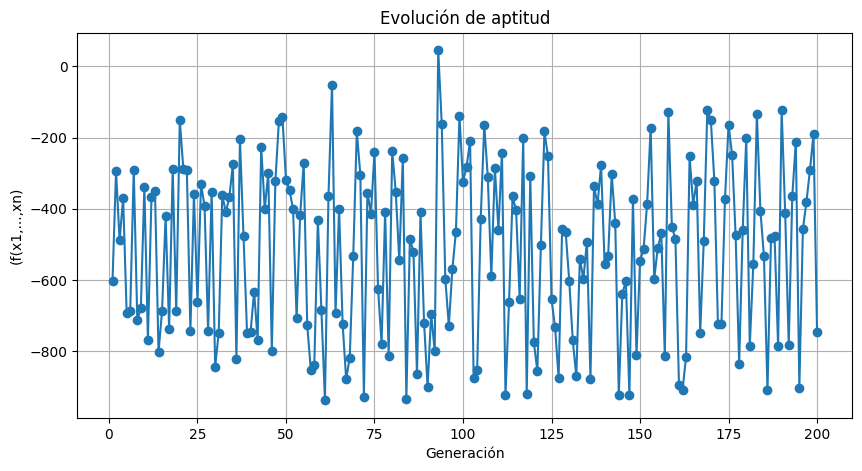

In [132]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target=0):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break

        selecto_pob, _ = SUS(pob, m, a, b, decimales, epsilon)
        
        # nueva población
        new_pob = []
        for i in range(0, pob_size, 2):
            padre1 = selecto_pob[i]
            padre2 = selecto_pob[i+1]
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", deco_ind(mejor_ind, m, a, b, decimales))
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))
    

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
